<a href="https://colab.research.google.com/github/shubhamByte/Lab_Assignment_3/blob/main/B20AI039_q2_lab_assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 70.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.6 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113654 sha256=cd96f417ef9242ff19302e8fd0b414e9b380c94c2c32e1ad349ef560db0d528c
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225

In [11]:
import geopandas as gpd
import shapely.geometry as shpgeo
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
flights = pd.read_csv('/content/Flightschedule (2).csv')

In [13]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Origin         2966 non-null   object
 1   Destination    2966 non-null   object
 2   Flight Number  2966 non-null   object
dtypes: object(3)
memory usage: 69.6+ KB


In [14]:
flights

,Origin,Destination,Flight Number
0,Ahmedabad,Amritsar,G8 537
1,Ahmedabad,Amritsar,G8 684
2,Ahmedabad,Amritsar,G8 537
3,Ahmedabad,Amritsar,G8 684
4,Ahmedabad,Amritsar,G8 537
...,...,...,...
2961,Varanasi,Patna,G8 408
2962,Varanasi,Patna,G8 408
2963,Varanasi,Patna,G8 408
2964,Varanasi,Ranchi,G8 408


#82 airport cordinates of India

In [15]:
airport_cordinates = pd.read_csv('/content/airport_cordinates.csv')
airport_cordinates

,city,latitude,longitude
0,New Delhi,28.566500,77.103104
1,Mumbai,19.088699,72.867897
2,Bangalore,13.197900,77.706299
3,Chennai,12.990005,80.169296
4,Vasco da Gama,15.380800,73.831398
...,...,...,...
178,Shirpur,21.323999,74.956734
179,Umaria,23.532514,80.808220
180,Upper Tadong,27.306717,88.599650
181,Vanasthali,26.407627,75.870128


In [16]:
# create a new dataframe with unique flights
unique_flights_df = flights[['Origin', 'Destination', 'Flight Number']].drop_duplicates()

# merge the airport coordinates with unique flights dataframe for origin airport
unique_flights_df = unique_flights_df.merge(airport_cordinates, left_on='Origin', right_on='city', how='left')
unique_flights_df = unique_flights_df.rename(columns={'latitude': 'origin_latitude', 'longitude': 'origin_longitude'})
unique_flights_df = unique_flights_df.drop(columns=['city'])

# merge the airport coordinates with unique flights dataframe for destination airport
unique_flights_df = unique_flights_df.merge(airport_cordinates, left_on='Destination', right_on='city', how='left')
unique_flights_df = unique_flights_df.rename(columns={'latitude': 'destination_latitude', 'longitude': 'destination_longitude'})
unique_flights_df = unique_flights_df.drop(columns=['city'])

# print the final dataframe
unique_flights_df.tail()

,Origin,Destination,Flight Number,origin_latitude,origin_longitude,destination_latitude,destination_longitude
2147,Varanasi,Mumbai,G8 350,25.4524,82.859299,18.962300,72.903083
2148,Varanasi,Mumbai,G8 350,25.4524,82.859299,18.982033,72.821567
2149,Varanasi,Mumbai,G8 350,25.4524,82.859299,18.942650,72.794017
2150,Varanasi,Patna,G8 408,25.4524,82.859299,25.591299,85.087997
2151,Varanasi,Ranchi,G8 408,25.4524,82.859299,23.314301,85.321701


In [17]:
unique_flights_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152 entries, 0 to 2151
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Origin                 2152 non-null   object 
 1   Destination            2152 non-null   object 
 2   Flight Number          2152 non-null   object 
 3   origin_latitude        1810 non-null   float64
 4   origin_longitude       1810 non-null   float64
 5   destination_latitude   1806 non-null   float64
 6   destination_longitude  1806 non-null   float64
dtypes: float64(4), object(3)
memory usage: 134.5+ KB


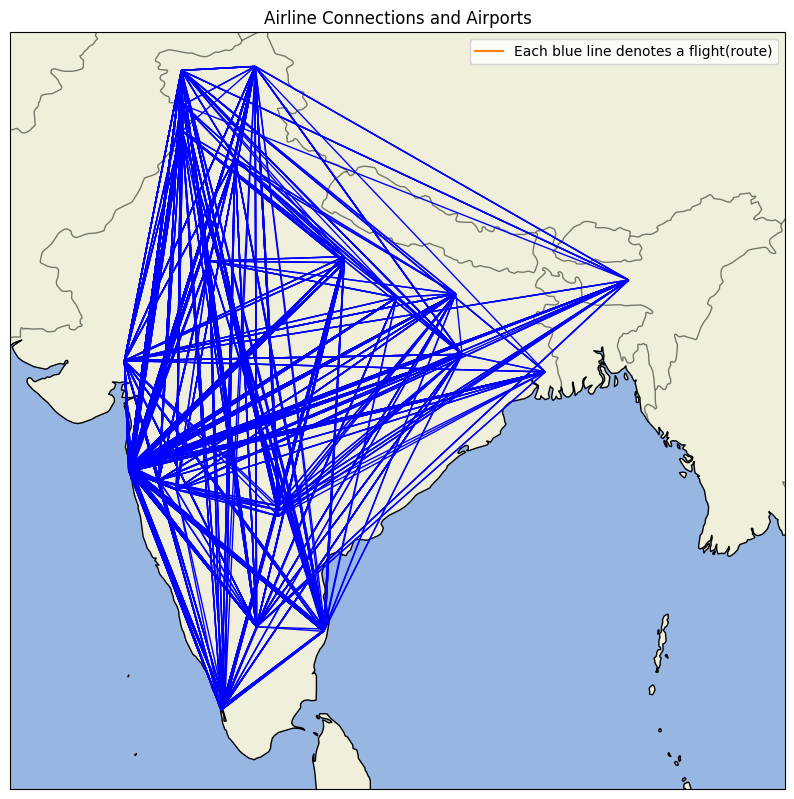

In [18]:
import geopandas as gpd
from shapely.geometry import Point, LineString
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# create a geopandas dataframe with the columns mentioned
unique_flights_df = gpd.GeoDataFrame(unique_flights_df, 
                                     geometry=[LineString([(row['origin_longitude'], row['origin_latitude']),
                                                           (row['destination_longitude'], row['destination_latitude'])])
                                               for _, row in unique_flights_df.iterrows()])

# create a geopandas dataframe for the airports
airports_df = gpd.GeoDataFrame(
    airport_cordinates, geometry=gpd.points_from_xy(airport_cordinates['longitude'], airport_cordinates['latitude']))

# plot the connections and airports on a map
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# add countries as a basemap
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
cartopy.feature.STATES.with_scale('10m')
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)

# plot the connections
unique_flights_df.plot(ax=ax, color='blue', linewidth=1)

# plot the airports and annotate them with their index
for i, row in airports_df.iterrows():
    if(i == 1):
      ax.plot(row.geometry.x, row.geometry.y,label = 'Each blue line denotes a flight(route)')
    else:
      ax.plot(row.geometry.x, row.geometry.y)

# set the title of the plot
ax.set_title('Airline Connections and Airports')
ax.legend()
# show the plot
plt.show()
